In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import six

from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2

folder = 'figures' #'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages'

import flotilla

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'
study = flotilla.embark('singlecell_pnm_figure5_voyages', flotilla_dir=flotilla_dir)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2017-01-14 11:03:38	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure5_voyages/datapackage.json
2017-01-14 11:03:38	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.
2017-01-14 11:04:29 	Initializing Study
2017-01-14 11:04:29 	Initializing Predictor configuration manager for Study
2017-01-14 11:04:29	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2017-01-14 11:04:29	Added ExtraTreesClassifier to default predictors
2017-01-14 11:04:29	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2017-01-14 11:04:29	Added ExtraTreesRegressor to default predictors
2017-01-14 11:04:29	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.G

Error loading species hg19 data: HTTP Error 404: Not Found

In [3]:
figure_folder = '{}/002_waypointplots'.format(folder)
! mkdir $figure_folder

mkdir: cannot create directory `figures/002_waypointplots': File exists


In [4]:
waypoints = study.supplemental.waypoints.rename(columns={'Unnamed: 1': 'event_id'})

In [5]:
waypoints = waypoints.set_index('event_id', append=True)
waypoints.head()

0  \
phenotype event_id                                                       
MN        isoform1=junction:chr10:101163392-101165512:-|i...  0.000000   
          isoform1=junction:chr10:101476219-101480743:-|i...  0.052632   
          isoform1=junction:chr10:102114390-102120490:+|i...  0.000000   
          isoform1=junction:chr10:102283687-102286731:-|i...  0.000000   
          isoform1=junction:chr10:102746733-102747069:-|i...  0.133333   

                                                                     1  
phenotype event_id                                                      
MN        isoform1=junction:chr10:101163392-101165512:-|i...  1.000000  
          isoform1=junction:chr10:101476219-101480743:-|i...  0.947368  
          isoform1=junction:chr10:102114390-102120490:+|i...  1.000000  
          isoform1=junction:chr10:102283687-102286731:-|i...  1.000000  
          isoform1=junction:chr10:102746733-102747069:-|i...  0.866667

In [6]:
import bonvoyage

In [7]:
study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']).size()

phenotype  modality     
MN         bimodal          1235
           excluded         2216
           included         3137
           uncategorized       9
NPC        bimodal          1910
           excluded         2970
           included         4514
           uncategorized      20
iPSC       bimodal          2679
           excluded         3725
           included         6182
           middle              1
           uncategorized      74
dtype: int64

In [8]:
study.supplemental.modalities_tidy = study.supplemental.modalities_tidy.replace(
    {'modality': {'ambivalent': 'uncategorized', 'concurrent': 'middle'}})

In [9]:
study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']).size()

phenotype  modality     
MN         bimodal          1235
           excluded         2216
           included         3137
           uncategorized       9
NPC        bimodal          1910
           excluded         2970
           included         4514
           uncategorized      20
iPSC       bimodal          2679
           excluded         3725
           included         6182
           middle              1
           uncategorized      74
dtype: int64

In [10]:
modalities_grouped = study.supplemental.modalities_tidy.groupby('phenotype')

In [11]:
import matplotlib as mpl

In [12]:
sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})


In [13]:
from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER


In [19]:
pkm_event = u'isoform1=junction:chr15:72494962-72499068:-@exon:chr15:72494795-72494961:-@junction:chr15:72492997-72494794:-|isoform2=junction:chr15:72495530-72499068:-@exon:chr15:72495363-72495529:-@junction:chr15:72492997-72495362:-'

In [16]:
import bonvoyage

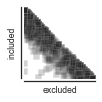

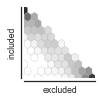

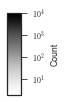

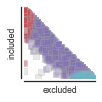

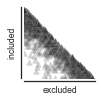

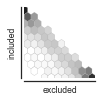

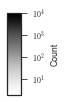

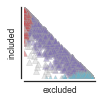

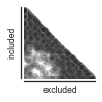

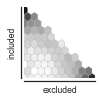

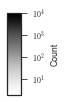

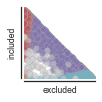

In [17]:
kinds = 'scatter', 'hexbin'

colorbar_ticklabels = [r'$10^{' + str(i) + '}$' for i in range(1, 5)]

for phenotype, df in waypoints.groupby(level=0, axis=0):
    df.index = df.index.droplevel(0)
    marker = study.phenotype_to_marker[phenotype]
    
#     six.print_(df.head())
    
    for kind in kinds:
        fig, ax = plt.subplots(figsize=(1.5, 1.5))
        kwargs = dict(rasterized=True, alpha=0.2, marker=marker) if kind == 'scatter' else dict(gridsize=10, vmax=4)
        bonvoyage.waypointplot(df, ax=ax, kind=kind, **kwargs)

#         # Double-plot PKM
#         x, y = df.loc[pkm_event]
#         color = study.phenotype_to_color[phenotype]
#         ax.plot(x, y, marker, markerfacecolor=None, markeredgecolor='k', markeredgewidth=.5, color=color)
#         ax.set(title='')
        
        ax.set(title='')
        fig.tight_layout()
#         sns.despine(offset=2)
        fig.savefig('{}/{}_{}.pdf'.format(figure_folder, phenotype, kind), dpi=300)
        
        if kind == 'hexbin':
            fig_colorbar, ax_colorbar = plt.subplots(figsize=(1, 1.5))
            plt.colorbar(ax.collections[0], cax=ax_colorbar, 
                         orientation='vertical',  label='Count', 
                         ticks=[1, 2, 3, 4])#mpl.ticker.MaxNLocator(4))
            ax_colorbar.yaxis.set_ticklabels(colorbar_ticklabels)
            fig_colorbar.tight_layout()
            fig_colorbar.savefig('{}/{}_{}_colorbar.pdf'.format(figure_folder, phenotype, kind), dpi=300)
        
        
    fig, ax = plt.subplots(figsize=(1.5, 1.5))
    modality_df = modalities_grouped.get_group(phenotype)
    groupby = modality_df.set_index('event_id')['modality']
    bonvoyage.waypointplot(df, ax=ax, kind='scatter', rasterized=True, features_groupby=groupby, marker=marker)
    ax.set(title='')
#     sns.despine(offset=3)
    fig.tight_layout()
    fig.savefig('{}/{}_scatter_modality.pdf'.format(figure_folder, phenotype), dpi=300)


In [20]:
kind = 'hexbin'

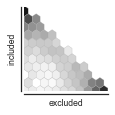

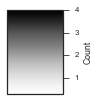

In [23]:
fig, ax = plt.subplots(figsize=(1.5, 1.5))
kwargs = dict(rasterized=True, alpha=0.2, marker=marker) if kind == 'scatter' else dict(gridsize=10, vmax=4)
bonvoyage.waypointplot(df, ax=ax, kind=kind, **kwargs)


fig_colorbar, ax_colorbar = plt.subplots(figsize=(1, 1.5))
plt.colorbar(ax.collections[0], cax=ax_colorbar, 
                         orientation='vertical',  label='Count', 
                         ticks=[-1, 0, 1, 2, 3, 4])


# # Double-plot PKM
# x, y = df.loc[pkm_event]
# color = study.phenotype_to_color[phenotype]
# ax.plot(x, y, marker, markerfacecolor=None, markeredgecolor='k', markeredgewidth=1, color=color)
# ax.set(title='')



### Same thing, but double-plot PKM

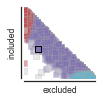

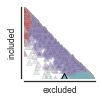

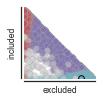

In [24]:
kind = 'scatter'

colorbar_ticklabels = [r'$10^{' + str(i) + '}$' for i in range(4)]

for phenotype, df in waypoints.groupby(level=0, axis=0):
    df.index = df.index.droplevel(0)
#     six.print_(df.head())
    
    fig, ax = plt.subplots(figsize=(1.5, 1.5))
    modality_df = modalities_grouped.get_group(phenotype)
    groupby = modality_df.set_index('event_id')['modality']
    marker = study.phenotype_to_marker[phenotype]
    bonvoyage.waypointplot(df, ax=ax, kind='scatter', rasterized=True, features_groupby=groupby, marker=marker)
    
    # Double-plot PKM
    x, y = df.loc[pkm_event]
    color = MODALITY_TO_COLOR[groupby[pkm_event]]
    ax.plot(x, y, marker, markerfacecolor=None, markeredgecolor='k', markeredgewidth=1, color=color)
    ax.set(title='')
    
    fig.tight_layout()
    fig.savefig('{}/{}_scatter_modality_pkm_annotated.pdf'.format(figure_folder, phenotype), dpi=300)
